<a href="https://colab.research.google.com/github/AechGit/Energy-Consumption-Project-Springboard/blob/main/Hitesh_Energy_consumption_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement :**
In this project, the goal is to develop a predictive model that can forecast future energy consumption values for a power grid based on historical consumption patterns. The dataset contains time series data of energy consumption recorded at regular intervals

**Dataset Name: Household Power Consumption Data**

Dataset Overview: This dataset contains detailed measurements of electric power consumption in a single household over a period of time. The dataset captures electrical energy usage, including active and reactive power, voltage, current intensity, and energy sub-metering. It is structured in a time series format, where each record represents one minute of power consumption data.

Features:

**Date**: The date when the data was recorded, in the format dd/mm/yyyy.

**Time**: The time when the data was recorded, in the format hh:mm:ss.

**Global Active Power** (kilowatts): The total active power consumed by the household, measured in kilowatts (kW). This is the primary measure of power consumption and represents the rate at which the household consumes electricity.

**Global Reactive Power** (kilowatts): The reactive power consumed by the household, measured in kilowatts (kW). Reactive power is the power that flows back and forth between the source and the load, and it is important for maintaining voltage levels in the system.

**Voltage (volts)**: The household voltage measured during each recording. It indicates the potential difference in the electrical system and is crucial for ensuring safe and efficient power distribution.

**Global Intensity** (amps): The intensity of the electrical current flowing through the household, measured in amperes (A). It reflects the overall current drawn by the household appliances.

**Sub-Metering 1** (watt-hour): Energy consumption in watt-hours measured by sub-metering channel 1. This sub-metering corresponds to specific electrical circuits within the household, such as the kitchen or laundry appliances.

**Sub-Metering 2** (watt-hour): Energy consumption in watt-hours measured by sub-metering channel 2. This channel captures the power usage of additional household circuits, typically the heating and cooling systems.

**Sub-Metering 3** (watt-hour): Energy consumption in watt-hours measured by sub-metering channel 3, typically representing power consumption from the rest of the household circuits, such as lighting or general power outlets.




**Step 1:** Loading the Dataset

This step downloads the dataset from Google Drive and loads it into a pandas DataFrame.

In [5]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view?usp=sharing


Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=bc0976e7-8635-475d-bf74-a2a0861f5dc1
To: /content/household_power_consumption.txt
100% 133M/133M [00:01<00:00, 72.7MB/s]


In [6]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/household_power_consumption.txt',sep=";")

<ipython-input-6-c4186d8df91e>:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/household_power_consumption.txt',sep=";")


**Step 2**. Preview the Data

In [8]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [10]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


**Step 3:** Dataset Summary

Generate basic statistical summaries and the structure of the dataset.

In [11]:
len(df)

2075259

In [12]:
df.shape

(2075259, 9)

In [13]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


**Step 4:** Checking for Missing Values

Before data cleaning, it’s important to know if there are any missing values.

In [15]:
df.isnull().any() # Checks if any column contains missing values

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,False
Sub_metering_3,True


In [16]:
df.isnull().sum()  # Shows the number of missing values in each column

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [17]:
df.nunique()
# Shows the number of unique values in each column

,0
Date,1442
Time,1440
Global_active_power,6534
Global_reactive_power,896
Voltage,5168
Global_intensity,377
Sub_metering_1,153
Sub_metering_2,145
Sub_metering_3,32


**Step 5 :** Handling Missing Values

Missing values are replaced with zeros.

In [18]:
null_percentage = (df.isnull().sum() / len(df)) * 100 #This calculates the percentage of missing values for each column.
print(null_percentage)

Date                     0.000000
Time                     0.000000
Global_active_power      0.000000
Global_reactive_power    0.000000
Voltage                  0.000000
Global_intensity         0.000000
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           1.251844
dtype: float64


In [19]:
df.fillna(0 , inplace =True) # Fills all missing values with 0

In [20]:
df.isnull()  # Re-check if there are still any missing values

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2075254,False,False,False,False,False,False,False,False,False
2075255,False,False,False,False,False,False,False,False,False
2075256,False,False,False,False,False,False,False,False,False
2075257,False,False,False,False,False,False,False,False,False


**Step 6:** Type Conversion

Some columns have incorrect data types due to the mixed types warning. We convert them to numerical values.

In [21]:
conv_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in conv_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') #changes type from object to float


In [22]:
df.info()  # Displays the updated data types and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [23]:
df.describe(include = object) # Provides a summary of non-numeric (object) columns

,Date,Time
count,2075259,2075259
unique,1442,1440
top,6/12/2008,17:24:00
freq,1440,1442


**Conclusion there are no null values present**


***Framed Questions***

1.How has 'Global_active_power' changed or trended over time?

2.What kind of relationship exists between 'Global_active_power' and 'Voltage'?

3.In what way does 'Global_intensity' fluctuate throughout different hours of the day?

4.What is the average daily value of 'Sub_metering'?

5.How does 'Global_reactive_power' differ on holidays compared to regular days?

**DATA VISUALIZATION**

Question: How has 'Global_active_power' changed or trended over time?

Examining the trend of 'Global_active_power' over time, what patterns or shifts can be observed? Are there any noticeable increases or decreases that could indicate broader consumption trends or specific time periods where usage is higher or lower?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

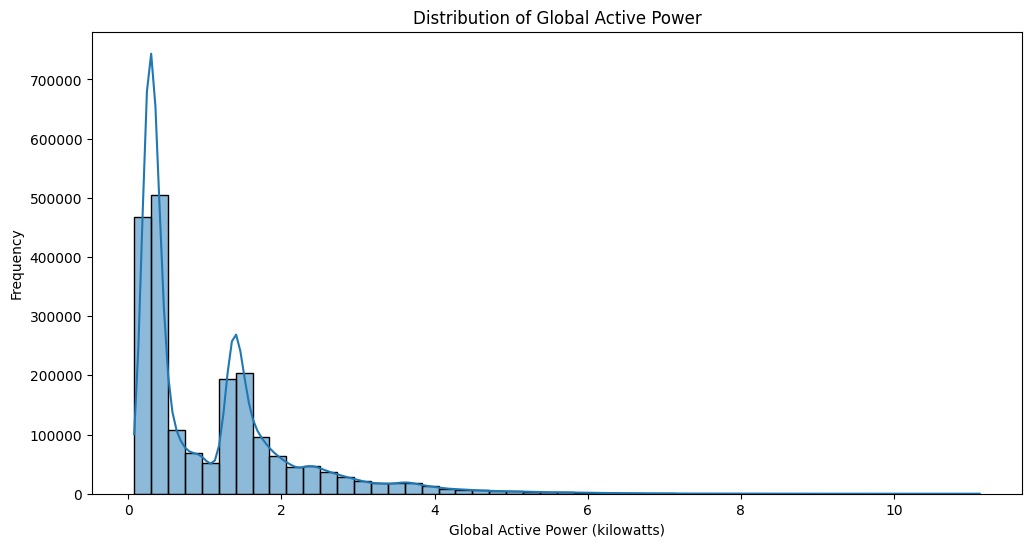

In [24]:
# 1. Distribution of 'Global_active_power'
plt.figure(figsize=(12, 6))
sns.histplot(df['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()

**Observation :**

1.Values above 2 kilowatts are less frequent, and values above 6 kilowatts are very rare. This could imply that high power consumption is either uncommon or occurs only under specific conditions.

2.There is a significant peak around 0.2–0.4 kilowatts, indicating that the most frequent usage level falls within this range. This suggests that low levels of active power are common in this dataset

**Question 2**

What is the nature of the relationship between 'Global_active_power' and 'Voltage'?

When comparing 'Global_active_power' to 'Voltage', do we see a correlation or any distinctive relationship between the two variables? Does one seem to increase or decrease in response to the other, or are they relatively independent?

<ipython-input-25-09078df502ce>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Voltage_range')['Global_active_power'].mean().plot(kind='bar', color='skyblue')


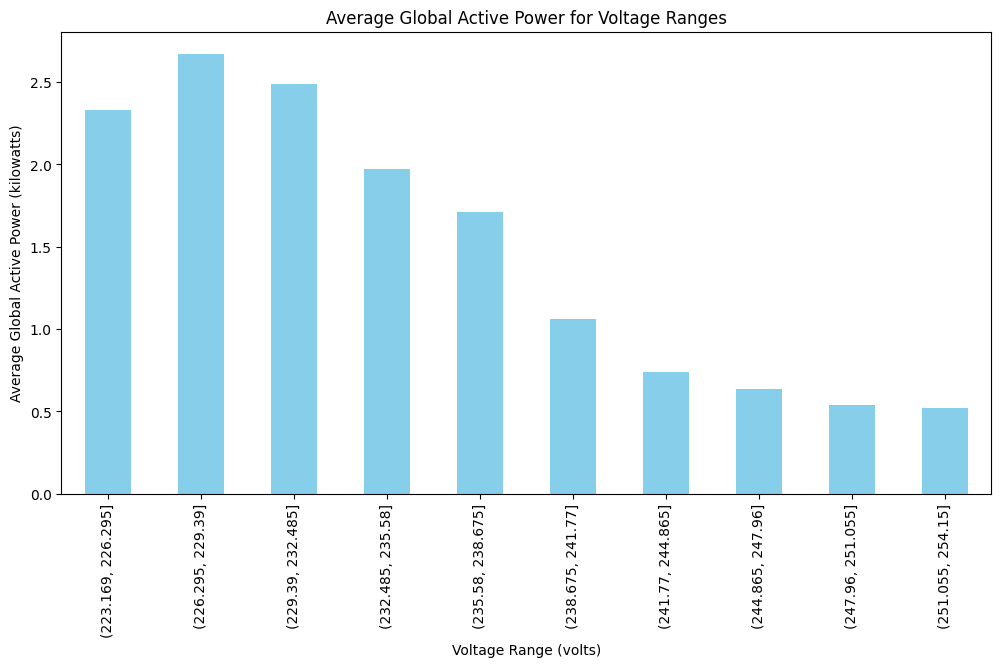

In [25]:
# Bar chart of 'Global_active_power' grouped by 'Voltage' ranges
df['Voltage_range'] = pd.cut(df['Voltage'], bins=10)  # Group voltage into bins
plt.figure(figsize=(12, 6))
df.groupby('Voltage_range')['Global_active_power'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Global Active Power for Voltage Ranges')
plt.xlabel('Voltage Range (volts)')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.show()

**Observation**

1.The voltage ranges from around 223.169 to 232.485 volts show the highest levels of average Global Active Power, with values above 2 kilowatts. This suggests that lower voltages are associated with higher power draw.

2.The chart reveals a general trend where the average Global Active Power decreases as the voltage range increases. In lower voltage ranges the average Global Active Power is higher, while in higher voltage ranges the average power consumption is lower.

**Question 3:**

How does 'Global_intensity' fluctuate across different hours of the day?

Observing the values of 'Global_intensity' over the course of a day, are there specific hours where it tends to peak or drop? Are there identifiable periods of high or low intensity that could suggest daily consumption patterns?

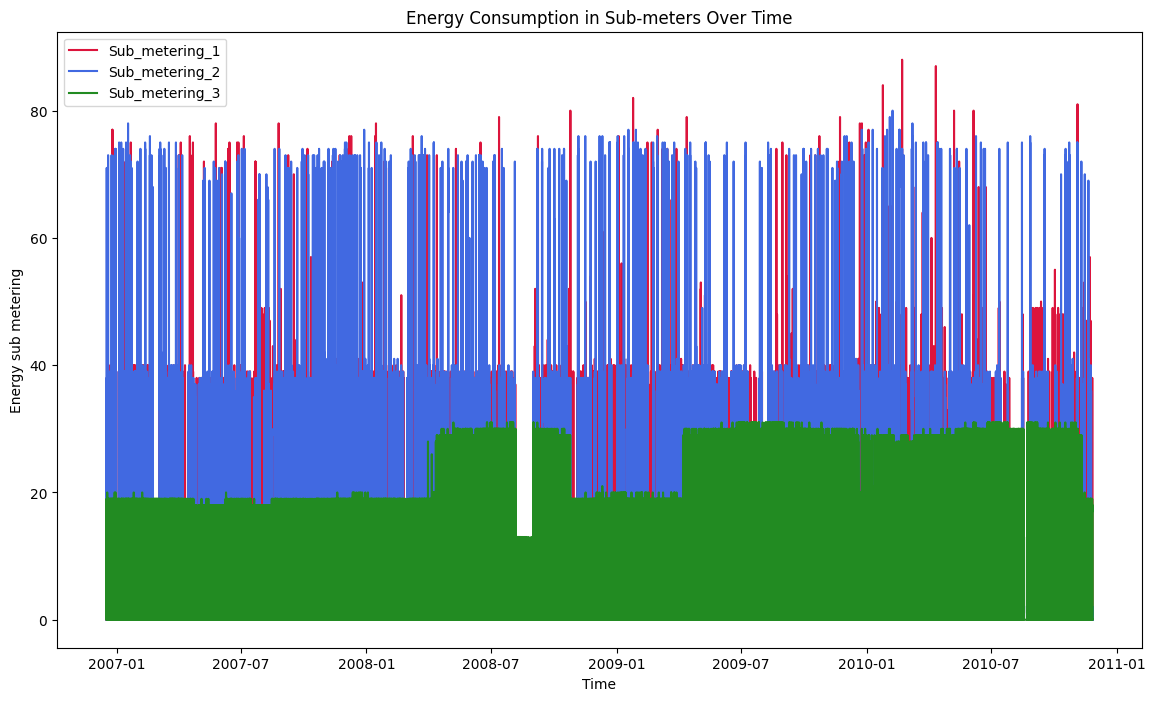

In [40]:
plt.figure(figsize=(14, 8))
plt.plot(df['Datetime'], df['Sub_metering_1'], label='Sub_metering_1', color='crimson')
plt.plot(df['Datetime'], df['Sub_metering_2'], label='Sub_metering_2', color='royalblue')
plt.plot(df['Datetime'], df['Sub_metering_3'], label='Sub_metering_3', color='forestgreen')
plt.title('Energy Consumption in Sub-meters Over Time')
plt.xlabel('Time')
plt.ylabel('Energy sub metering')
plt.legend()
plt.show()


**Observation:**

1.There is a high frequency of energy usage fluctuations, with frequent spikes across all sub-meters. This indicates intermittent or possibly highly variable energy consumption.

2.Sub_metering_1 and Sub_metering_2 seem to show a similar pattern of high-frequency fluctuations.

3.Sub_metering_3 shows fewer spikes, with more consistent values over time.

**Question:**

What is the average 'Sub_metering' value on a daily basis?

Calculating the average values of each 'Sub_metering' measurement per day, what does the data reveal about typical daily consumption? Are there variations in these averages that suggest certain days have higher or lower metered consumption?

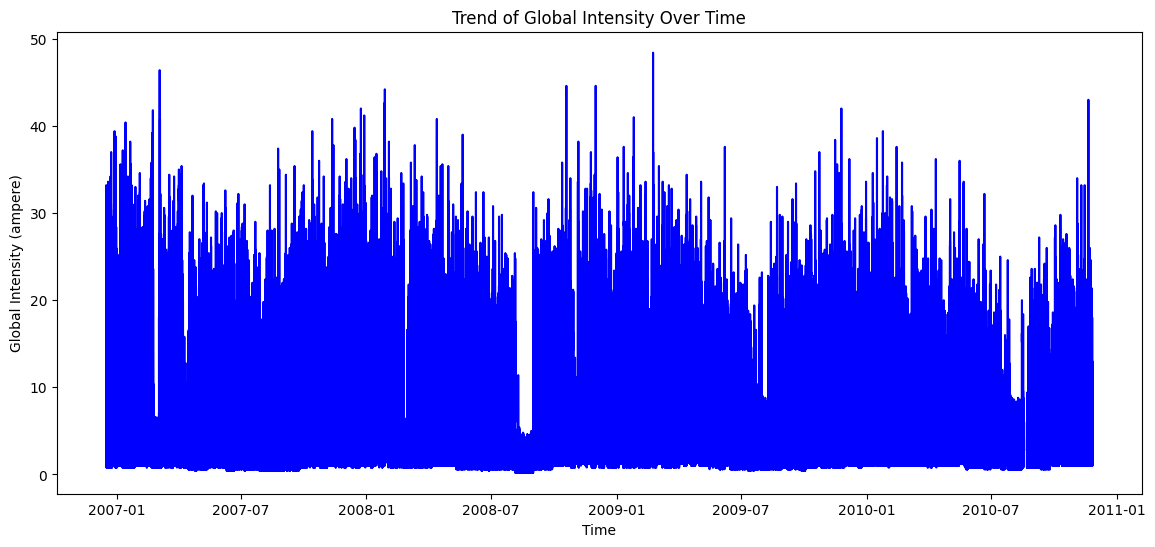

In [42]:
plt.figure(figsize=(14, 6))
plt.plot(df['Datetime'], df['Global_intensity'], color='blue')
plt.title('Trend of Global Intensity Over Time')
plt.xlabel('Time')
plt.ylabel('Global Intensity (ampere)')
plt.show()

**Observation**

1.The global intensity fluctuates significantly throughout the timeframe, showing a pattern of peaks and troughs.

2.There seem to be periodic spikes, possibly corresponding to seasonal changes or other recurring events that increase global intensity.

3.Although there is high variability, there may be a cyclic or seasonal trend to the pattern, with the frequency of peaks and valleys potentially following a regular cycle.

#Pair plot for selected columns to observe correlations

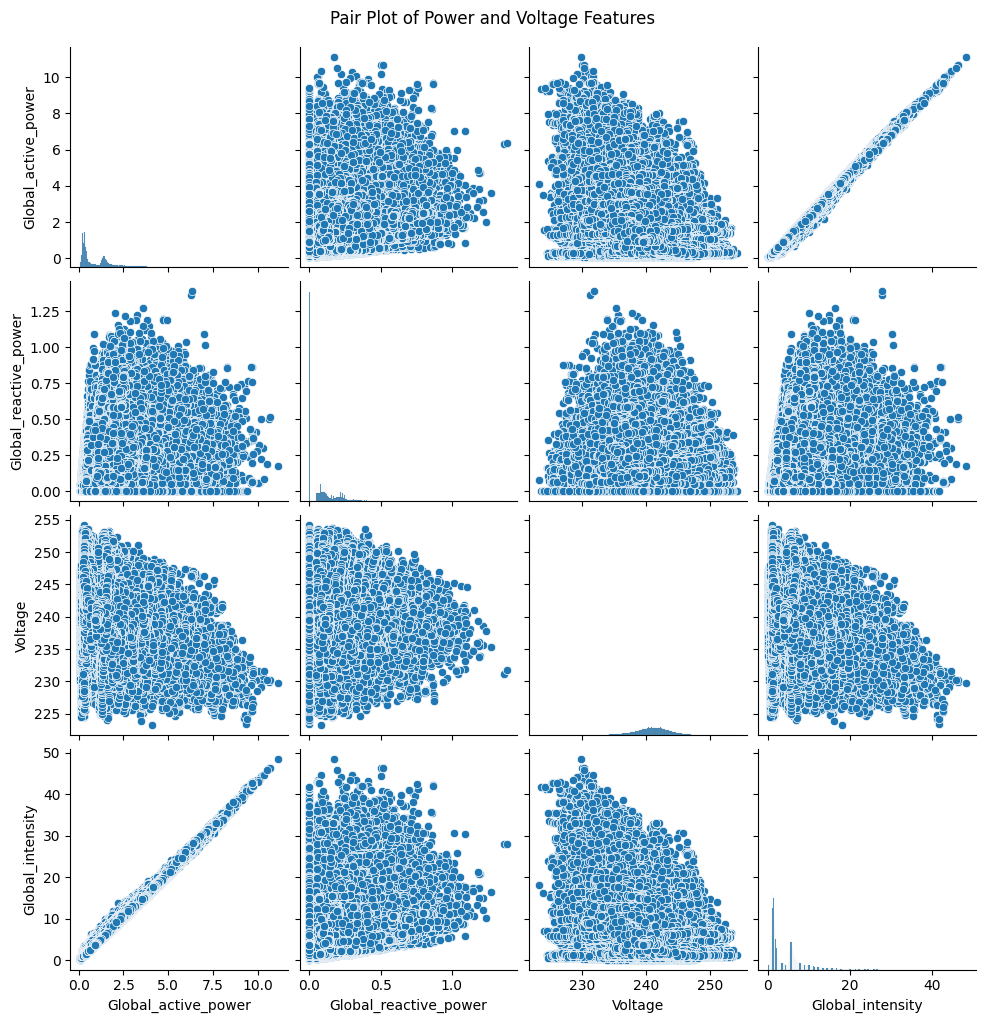

In [43]:
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
sns.pairplot(df[cols].dropna())
plt.suptitle('Pair Plot of Power and Voltage Features', y=1.02)
plt.show()

**Question**

How does 'Global_reactive_power' differ on holidays compared to regular days?

**Step 1:**
Extract date and time components into tuples

In [44]:
df['Date'] = df['Datetime'].apply(lambda dt: (dt.year, dt.month, dt.day))
df['Time'] = df['Datetime'].apply(lambda dt: (dt.hour, dt.minute))

check the output

In [45]:

print(df[['Datetime', 'Date', 'Time']].head())

             Datetime            Date      Time
0 2006-12-16 17:24:00  (2006, 12, 16)  (17, 24)
1 2006-12-16 17:25:00  (2006, 12, 16)  (17, 25)
2 2006-12-16 17:26:00  (2006, 12, 16)  (17, 26)
3 2006-12-16 17:27:00  (2006, 12, 16)  (17, 27)
4 2006-12-16 17:28:00  (2006, 12, 16)  (17, 28)


In [46]:
print(df[['Datetime', 'Date', 'Time']].tail())

                   Datetime            Date      Time
2075254 2010-11-26 20:58:00  (2010, 11, 26)  (20, 58)
2075255 2010-11-26 20:59:00  (2010, 11, 26)  (20, 59)
2075256 2010-11-26 21:00:00  (2010, 11, 26)   (21, 0)
2075257 2010-11-26 21:01:00  (2010, 11, 26)   (21, 1)
2075258 2010-11-26 21:02:00  (2010, 11, 26)   (21, 2)


**Step 2:**
Install The holidays library

In [47]:
!pip install holidays

**Step 3:**
Finding if the days are holidays or not

#(0 = not holiday, 1= holiday)

In [48]:
import holidays
from datetime import date
holiday_list = holidays.India(years=[2006, 2007, 2008, 2009, 2010])

def check_if_holiday(date_tuple):
    holiday_date = date(*date_tuple)
    return 1 if holiday_date in holiday_list else 0

df['Holiday'] = df['Date'].apply(lambda x: check_if_holiday((x[0], x[1], x[2])))
print(df[['Datetime', 'Date', 'Holiday']])

                   Datetime            Date  Holiday
0       2006-12-16 17:24:00  (2006, 12, 16)        0
1       2006-12-16 17:25:00  (2006, 12, 16)        0
2       2006-12-16 17:26:00  (2006, 12, 16)        0
3       2006-12-16 17:27:00  (2006, 12, 16)        0
4       2006-12-16 17:28:00  (2006, 12, 16)        0
...                     ...             ...      ...
2075254 2010-11-26 20:58:00  (2010, 11, 26)        0
2075255 2010-11-26 20:59:00  (2010, 11, 26)        0
2075256 2010-11-26 21:00:00  (2010, 11, 26)        0
2075257 2010-11-26 21:01:00  (2010, 11, 26)        0
2075258 2010-11-26 21:02:00  (2010, 11, 26)        0

[2075259 rows x 3 columns]


In [49]:
holiday_counts = df['Holiday'].value_counts()
print("Holiday counts:")
print(f"Holiday (1): {holiday_counts.get(1, 0)}")
print(f"Non-Holiday (0): {holiday_counts.get(0, 0)}")

Holiday counts:
Holiday (1): 105120
Non-Holiday (0): 1970139


There are 105120 Holidays
and 1970139 non Holidays

Find if the there is sunlight during the time given in the dataset
# ( 0600-1800 hours ---1 (light is there) else 0)

In [50]:
def check_sunlight(time):
    hour = time[0]
    return 1 if 6 <= hour < 18 else 0
df['Sunlight'] = df['Time'].apply(check_sunlight)
print(df[['Datetime', 'Time', 'Sunlight']].head())

             Datetime      Time  Sunlight
0 2006-12-16 17:24:00  (17, 24)         1
1 2006-12-16 17:25:00  (17, 25)         1
2 2006-12-16 17:26:00  (17, 26)         1
3 2006-12-16 17:27:00  (17, 27)         1
4 2006-12-16 17:28:00  (17, 28)         1


In [51]:
print(df[['Datetime', 'Time', 'Sunlight']].tail())

                   Datetime      Time  Sunlight
2075254 2010-11-26 20:58:00  (20, 58)         0
2075255 2010-11-26 20:59:00  (20, 59)         0
2075256 2010-11-26 21:00:00   (21, 0)         0
2075257 2010-11-26 21:01:00   (21, 1)         0
2075258 2010-11-26 21:02:00   (21, 2)         0


Visualizing the new coloumns

<ipython-input-58-773a2abee094>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[0, 1], y=df['Sunlight'].value_counts().sort_index(), palette="Reds_d")


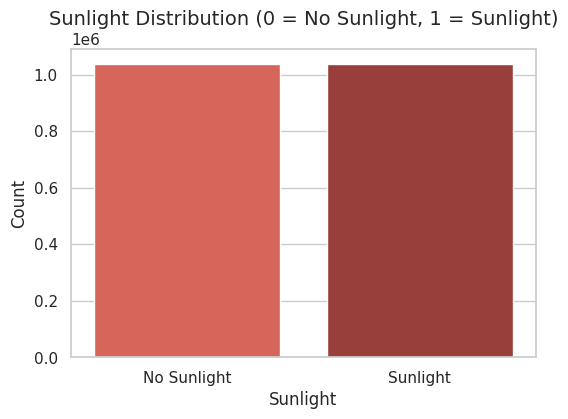

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="whitegrid")

# Plot Sunlight Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=[0, 1], y=df['Sunlight'].value_counts().sort_index(), palette="Reds_d")
plt.title('Sunlight Distribution (0 = No Sunlight, 1 = Sunlight)', fontsize=14)
plt.xlabel('Sunlight', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Sunlight', 'Sunlight'])
plt.show()




**observations:**

1.Both "No Sunlight" and "Sunlight" have counts close to each other, with "No Sunlight" having a slightly higher count.

<ipython-input-59-265d7c692c58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[0, 1], y=df['Holiday'].value_counts().sort_index(), palette="Blues_d")


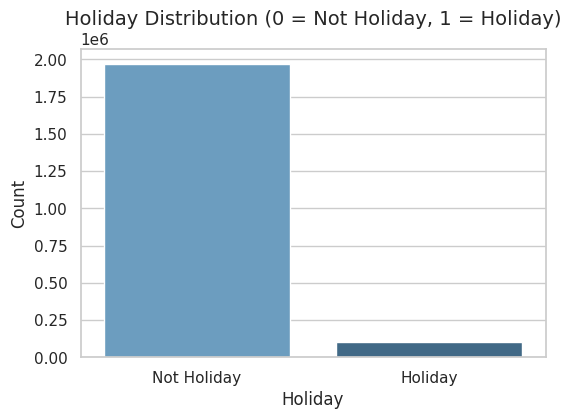

In [59]:
# Plot Holiday Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=[0, 1], y=df['Holiday'].value_counts().sort_index(), palette="Blues_d")
plt.title('Holiday Distribution (0 = Not Holiday, 1 = Holiday)', fontsize=14)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Holiday', 'Holiday'])
plt.show()

**Observations:**

1.There is a significant imbalance, with "Not Holiday" days far outnumbering "Holiday" days.

